In [1]:
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
import pickle
import ast
import pandas as pd
import numpy as np
import time
from sys import exc_info
import subprocess
import os
# pd.set_option('display.max_columns', None)
# pd.set_option('display.max_colwidth', None)

class ElbowMethod():
    
    def __init__(self, verbose=0):
        init_timer = time.time()
        self.df_r, self.df_b, self.df_bt, self.df_t = self._load_df(verbose=verbose)
        self.sparse_matrix, self.sparse_matrix_indexes, self.sparse_matrix_columns = self._init_sparse_matrix(verbose=verbose)
        self.wcss = []
        self.differences = []
        if verbose > 0:
            print("Time to init:", time.time() - init_timer, "sec")
        
    def _load_df(self, verbose):
        if verbose > 0:
            print("Loading ratings.csv ...")
        df_r = pd.read_csv('ratings.csv')
        df_r.sort_values(by="user_id", inplace=True, ignore_index=True)
        df_r = df_r.reset_index(drop=True)
        if verbose > 0:
            print("Done")
            print("Loading books.csv ...")
        df_b = pd.read_csv('books.csv')
        if verbose > 0:
            print("Done")
            print("Loading book_tags.csv ...")
        df_bt = pd.read_csv('book_tags.csv')
        if verbose > 0:
            print("Done")
            print("Loading tags.csv ...")
        df_t = pd.read_csv('tags.csv')
        if verbose > 0:
            print("Done")
        return df_r, df_b, df_bt, df_t
    
    
    def _init_sparse_matrix(self, verbose):
        
        if verbose > 0:
            print("computing sparse matrix ...")
            
        # some books are marked as having been tagged a negative number of times
        # with a certain tag; we drop those lines from df_bt
        idx = list(self.df_bt.loc[self.df_bt["count"] < 0].index.values)
        df_bt_2 = self.df_bt.drop(labels=idx)
        
        # there are some duplicates in df_bt_2, we drop them
        df_bt_2.drop_duplicates(subset=["goodreads_book_id", "tag_id"], inplace=True)
        
        # delete tags that tag less than n books

        # delete all tags that have a low count
        
        # compute the sparse matrix, by filling all null values with 0
        df_bt_pivot = df_bt_2.pivot(index="goodreads_book_id", columns ="tag_id", values="count").fillna(0)
        
        # PCA into n dimensions
        
        # add all ratings + languages
        
        # feature selection
        
        if verbose > 0:
            print("Done")
        
        return df_bt_pivot.values, df_bt_pivot.index.values, df_bt_pivot.columns.values

        
    def run(self, n_min, n_max, max_iterations = 300, verbose=0):
        
        run_timer = time.time()
        
        if verbose:
            print(f"Begin fitting for {n_max - n_min + 1} different numbers of clusters ...")
        
        for n_clusters in range(n_min, n_max + 1):
            if verbose:
                print(f"Fitting for {n_clusters} clusters ...")
            kmeans = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=max_iterations, n_init=10)
            kmeans.fit(self.sparse_matrix)
            self.wcss.append(kmeans.inertia_)
            if verbose:
                print("Done")
        
        for i in range(len(self.wcss)-1):
            self.differences.append(self.wcss[i] - self.wcss[i+1])
        
        if verbose > 0:
            print("Run time:", time.time() - run_timer, "sec")
        
        self.job_done()
    
    def plot(self, boundary, upto=None):
        
        if upto == None:
            wcss = self.wcss
            diff = self.differences
        else:
            wcss = self.wcss[:upto]
            diff = self.differences[:upto]
        
        plt.figure(figsize=(15, 6))
        
        plt.subplot(121).set_title("wcss = f(n_clusters)")
        plt.plot(range(1, len(wcss) + 1), wcss)
        plt.grid()
        
        plt.subplot(122).set_title("differences in each subsequent n_clusters")
        X = range(1, len(diff) + 1)
        plt.plot(X, diff)
        plt.plot(X, np.ones(len(diff)) * boundary, "r")
        plt.plot(X, np.ones(len(diff)) * (-boundary), "r")
        
        plt.show()
        
    
    def job_done(self):
        subprocess.Popen(['notify-send', "Computing done."])
        os.system('play -nq -t alsa -c1 synth 1 sin %-12 fade h 0.05 0.9 0.05 gain -9 && play -nq -t alsa -c1 synth 0.5 sin %-12 sin %-8 fade h 0.05 0.4 0.05 gain -9 && play -nq -t alsa -c1 synth 1.5 sin %-12 sin %-8 sin %-0 fade h 0.05 1.4 0.05 gain -9')

In [2]:
elbow_method = ElbowMethod(verbose=1)

Loading ratings.csv ...
Done
Loading books.csv ...
Done
Loading book_tags.csv ...


FileNotFoundError: [Errno 2] No such file or directory: 'book_tags.csv'

In [ ]:
# elbow_method.df_b
elbow_method.df_b["test_total_ratings"] = elbow_method.df_b["ratings_1"] + elbow_method.df_b["ratings_2"] + elbow_method.df_b["ratings_3"] + elbow_method.df_b["ratings_4"] + elbow_method.df_b["ratings_5"]

In [ ]:
elbow_method.df_b

In [ ]:
elbow_method.sparse_matrix_indexes[5000]

In [ ]:
elbow_method.job_done()

In [ ]:
elbow_method.run(1, 20, verbose=1)

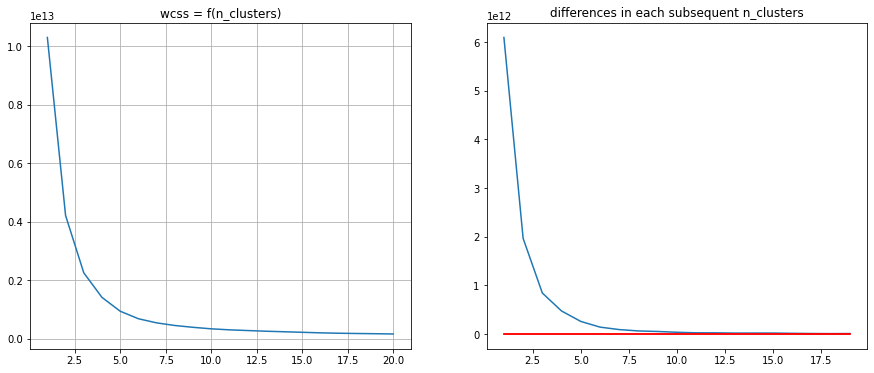

In [4]:
elbow_method.plot(500)

# Dump

In [31]:
df_test = pd.DataFrame.from_dict({"col1": [1,2,3], "col2": [4,5,6]})
data_to_add = pd.DataFrame.from_dict({"col1": [7], "col2": [8]})
df_test = df_test.append(data_to_add)
df_test

,col1,col2
0,1,4
1,2,5
2,3,6
0,7,8


In [62]:
dict_test = {"hahaha": []}
dict_test["hahaha"].append(2)
dict_test["hahaha"]

[2]

In [75]:
series_test = pd.Series(["a", "b", "a", "c", "c"])
test = pd.get_dummies(series_test)
test.melt()

,variable,value
0,a,1
1,a,0
2,a,1
3,a,0
4,a,0
5,b,0
6,b,1
7,b,0
8,b,0
9,b,0


In [3]:
# decorator
def f1(func):
    def wrapper(arg):
        print("function:", func.__name__, "- argument:", arg)
        return func(arg)
    return wrapper

@f1
def f2(x):
    return  x+1

print("result:", f2(1))


function: f2 - argument: 1
result: 2
